<a href="https://colab.research.google.com/github/youssadi99/deeplearning/blob/main/D%C3%A9mo_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [ ]:
#data preparing and loading
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

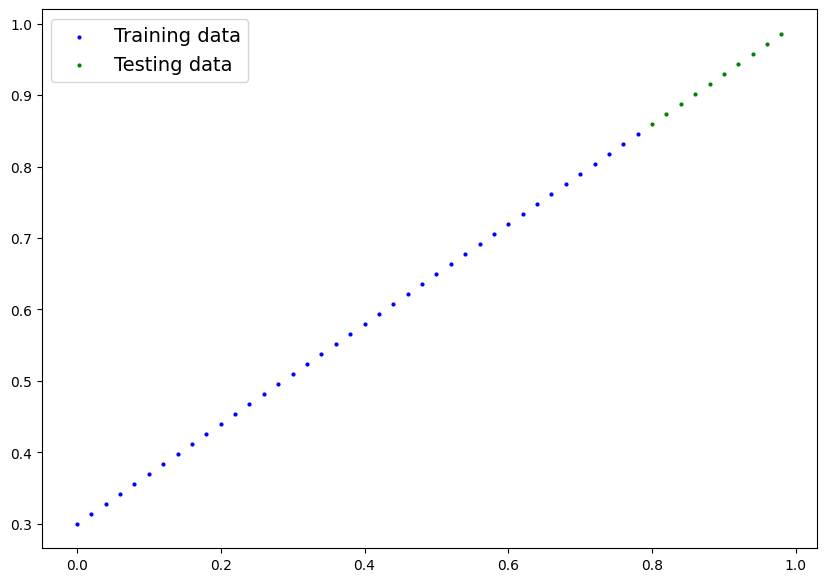

In [ ]:
KMP_DUPLICATE_LIB_OK=True
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
#named parameters
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [ ]:
#make predictions with model
#inference mode desactive le tracking des gradients ; on utiliser aussi le with torch.no_grad() mais l'inference est préférée
with torch.inference_mode():
    y_pred = model_0(X_test)
print(y_pred)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [ ]:
#setup a loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
#train the model
epocks = 200
epock_count = []
losses = []
test_losses = []
for epock in range(epocks):
    model_0.train() #train mode : set all param that require grad to true
    #forward pass
    y_pred = model_0(X_train)
    #calculate loss
    loss = loss_fn(y_pred, y_train)
    #print(f"Train Loss = ", loss)
    #optimizer.zero_grad()
    optimizer.zero_grad() #set gradients to zero : initialization
    #backward pass
    loss.backward()
    #update weights
    optimizer.step()
    #Testing loss: {loss_fn(model_0(X_test), y_test)}
    model_0.eval() #eval mode set all param that require grad to false (turn off many setting not needed for testing and evaluating like dropout batchnorm etc)
    with torch.inference_mode():
        test_pred = model_0(X_test)
        #Test Loss
        test_loss = loss_fn(test_pred, y_test)
        if epock % 10 == 0:
            epock_count.append(epock)
            losses.append(loss)
            test_losses.append(test_loss)
            print(f"Epock: {epock}, loss: {test_loss}")

        #print the model state dict
        print(model_0.state_dict())

Epock: 0, loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epock: 10, loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
OrderedDict([('weights', tensor([0.3874])), ('bias',

In [ ]:
with torch.inference_mode():
    y_pred = model_0(X_test)
print(y_pred)
print(y_pred-y_test)

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])
tensor([[0.0085],
        [0.0085],
        [0.0085],
        [0.0085],
        [0.0085],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0084]])


In [ ]:
from pathlib import Path
MODEL_DIR = Path("models")
MODEL_DIR.mkdir(exist_ok=True)
MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_DIR / MODEL_NAME
print(MODEL_SAVE_PATH)

models/model_0.pth


In [ ]:
#saving the model
torch.save(model_0.state_dict(), MODEL_SAVE_PATH )

In [ ]:
#load the model
loaded_model_0  = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
print(loaded_model_0.state_dict())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [ ]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    y_loaded_pred = loaded_model_0(X_test)
print(y_loaded_pred)

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])
